In [1]:
import pandas as pd

In [9]:
#Load USDA database & transform it into the form we need
food_database = pd.read_excel("2019-2020 FNDDS At A Glance - FNDDS Nutrient Values.xlsx", 
                              header = 1 #set column headers
                              )


,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
0,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,...,0.040,0.000,0.374,0.052,0.0,0.026,0.000,0.000,0.000,87.50
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",52,3.33,4.83,4.88,0.0,2.14,...,0.002,0.000,0.074,0.008,0.0,0.003,0.000,0.001,0.000,88.92
2,11111000,"Milk, whole",1002,"Milk, whole",61,3.27,4.63,4.81,0.0,3.20,...,0.004,0.000,0.115,0.013,0.0,0.004,0.001,0.002,0.000,88.10
3,11112110,"Milk, reduced fat (2%)",1004,"Milk, reduced fat",50,3.36,4.90,4.89,0.0,1.90,...,0.002,0.000,0.061,0.007,0.0,0.003,0.000,0.001,0.000,89.10
4,11112210,"Milk, low fat (1%)",1006,"Milk, lowfat",43,3.38,5.18,4.96,0.0,0.95,...,0.001,0.000,0.033,0.004,0.0,0.001,0.000,0.000,0.000,89.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,99997802,Tomatoes as ingredient in omelet,9999,Not included in a food category,25,1.11,5.48,3.42,1.6,0.23,...,0.000,0.000,0.089,0.004,0.0,0.000,0.000,0.000,0.000,92.57
5620,99997804,Other vegetables as ingredient in omelet,9999,Not included in a food category,39,3.25,5.74,2.73,1.4,0.39,...,0.000,0.000,0.174,0.001,0.0,0.000,0.000,0.000,0.000,89.67
5621,99997810,Vegetables as ingredient in curry,9999,Not included in a food category,52,1.81,11.60,3.25,2.2,0.19,...,0.000,0.000,0.052,0.012,0.0,0.000,0.000,0.000,0.000,85.59
5622,99998130,Sauce as ingredient in hamburgers,9999,Not included in a food category,272,1.34,17.14,13.08,0.6,22.85,...,0.106,0.133,11.810,1.682,0.0,0.015,0.000,0.000,0.002,55.97


Current thought:
- amount of foods are inputs
- quality rates are weights (e.g., amount of calories per 100gs)

In [37]:
#very basic prototype optimization algorithm

import numpy as np
import matplotlib.pyplot as plt

#intialzie amounts
amounts = np.array([[1.0,1.0]])

#rows represent food, cols represent qualities
quality_rates = np.array([[1,2,.5],
                          [1,2,2]])

learning_rate = .001

#goal amounts
targets = [5,10,8]

outputs, errors, amountss = [], [], []

stop_time = 1000
for i in range(stop_time):
    output = np.dot(amounts, quality_rates)
    outputs.append(output)
    #squared error is the loss function
    error = (output - targets)**2
    errors.append(error)
    #derivative of loss wrt to output
    dloss = 2*(output - targets)
    #print(dloss)

    dmax = targets.copy
    dmax = np.ones_like(output)
    dmax[output >= targets] = 0 
    #print(dmax)

    dfoods = dloss * dmax
    #print(dfoods)

    #deriv wrt amounts is quality rate
    dinputs = np.dot(dfoods, quality_rates.T)
    #print(dinputs)

    amounts += -learning_rate * dinputs
    amountss.append(amounts)


print(amounts)
print(output)
print(error)

[[2.27147371 3.43186411]]
[[ 5.70333513 11.40667026  7.9994605 ]]
[[4.94680305e-01 1.97872122e+00 2.91059849e-07]]


How to fully implement for food
- we are going to minimize cost, while trying to meet thresholds for other items

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


food_data = pd.read_excel(r"C:\Users\Chris\Desktop\Diet Data\Diet Optimization.xlsx", sheet_name="For Python Test")

In [23]:
quality_rates = food_data.iloc[0:20,6:].to_numpy()

In [24]:
target_values = food_data.iloc[24:,2].to_numpy().astype(float).reshape(1,-1)
target_values

array([[0.000e+00, 2.035e+03, 1.530e+02, 5.000e+01, 2.000e+02, 3.000e+01,
        1.000e+03, 4.000e+02, 9.000e+02, 2.400e+00, 1.300e+00, 9.000e+01,
        1.500e+01, 1.500e+01, 1.200e+02, 9.000e-01, 8.000e+00, 4.000e+02,
        1.100e+01, 7.000e+02, 5.500e+01, 3.400e+03, 1.500e+03, 5.500e+02,
        1.200e+00, 1.300e+00, 1.600e+01, 1.600e+00]])

In [25]:
food_limits = food_data.iloc[24:44,6].to_numpy().reshape(1,-1)
food_limits

array([[3.  , 0.3 , 0.3 , 5.  , 1.5 , 1.  , 0.5 , 1.5 , 0.25, 0.5 , 0.5 ,
        0.5 , 0.5 , 0.1 , 1.4 , 1.  , 2.1 , 0.1 , 2.3 , 0.21]])

In [26]:
food_req = food_data.iloc[24:44,9].to_numpy().reshape(1,-1)
food_req

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.9 , 0.  , 0.  , 0.  , 2.25, 0.2 ]])

In [18]:
#amounts = np.random.rand(1,20) * 10
amounts = np.zeros((1,20))
#amounts[0,0] = 14
learning_rate = 1
#starting_learning_rate = .01
learning_rate_decay = 0#0.0000001
errors = []

dinputs_momentums = np.zeros_like(amounts)
cache = np.zeros_like(amounts)
epsilon = 1e-7 

beta_1 = .9
beta_2 = .999

lambda_penalty = .05
penalty_cache = np.zeros_like(amounts)

target_values_non_z = target_values.copy()
target_values_non_z[0,0] = 1e-7

for i in range(10000):

    outputs = np.dot(amounts, quality_rates)
    error = ((outputs - target_values_non_z)/target_values_non_z)**2         
    error[0,0] = 0 #we still calculate derivative, but exclude the error for cost
    error[0,2:][outputs[0,2:] >= target_values[0,2:]] = 0.0
    errors.append(np.sum(error))

    penalty_deriv = np.zeros_like(amounts)
    penalty_deriv[amounts.copy() > food_limits.copy()] = 1
    penalty_deriv[amounts.copy() < food_req.copy()] = -1
    penalty_deriv = penalty_deriv * food_limits.copy()

    dloss = 2*(outputs - target_values_non_z)/target_values_non_z**2
    dmax = np.ones_like(outputs)

    #we are looking to stay calorie target, and minimize costs, so want to avoid those
    #but once all the other ones have hit their goals, set them to 0
    #dmax[0,1] = 0 if outputs[0,1] <= target_values[0,1] else dmax[0,1]
    dmax[0,0] = 0
    dmax[0,2:][outputs[0,2:] >= target_values[0,2:]] = 0.0
    
    dfoods = dloss * dmax
    dinputs = np.dot(dfoods, quality_rates.T)

    #momentum
    dinputs_momentums = dinputs_momentums * beta_1 + dinputs.astype(float) * (1 - beta_1)
    correted_momentums = dinputs_momentums / (1 - beta_1 ** (i + 1))

    cache = cache * dinputs.astype(float) ** 2 #beta_2 + (1-beta_2) * dinputs.astype(float) ** 2
    corrected_cahce = cache #/ (1 - beta_2 ** (i + 1))
    penalty_cache += penalty_deriv **2
    
    amounts += -learning_rate * (correted_momentums / (np.sqrt(cache) + epsilon)  + lambda_penalty * penalty_deriv * 1/np.sqrt(penalty_cache+epsilon))

    learning_rate = learning_rate * (1 / (1 + learning_rate_decay * i))

results = np.dot(amounts, quality_rates)
print(results)
print(results - target_values)
print("final error:", errors[-1])
plt.plot(errors[0:])
plt.show()

OverflowError: (34, 'Result too large')

In [11]:
penalty_deriv = np.zeros_like(amounts)
penalty_deriv[amounts.copy() > food_limits.copy()] = 1
penalty_deriv[amounts.copy() < food_req.copy()] = -1
penalty_deriv = penalty_deriv * food_limits.copy()
penalty_deriv

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -2.3,  0. ]])

In [12]:
amounts

array([[2.06917488, 0.29789464, 0.2239849 , 2.91855552, 1.47326141,
        0.95078389, 0.48694994, 1.47945588, 0.2478282 , 0.4768447 ,
        0.48264619, 0.47516851, 0.48899912, 0.09696531, 1.22059628,
        0.98756274, 1.98092781, 0.09659181, 2.16728902, 0.20701223]])

In [1174]:
dmax

array([[0, 1, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0,
        0.0]], dtype=object)

Notes from this go around:
- have been successful in closely matching excel output
- requires averaging gradients (dividing dloss by sum of dmax)
- without cost constraint we get very close to solver results
- with cost constaint it is close, but a bit more different
- ideal learning rate  learning_rate = .00001

Possible Improvements
- RMS prop?/ADA grad?? - i think the key will be some type of per-parameter learning rate, as the parameters have very differnet sizes, thus a global rate does not work well. For example, applying the same learning rate to calories and omega3s doesn't work because calories has much higher magnitude values than omega3
- momentum
- adaptive gradient
- learning rate decay

Features that I don't think are very helpful (pre-adagrad/RMS prop):
- gradient normalization - does not seem to make a huge difference. I think this is not very beneficial because there is nothing really to smooth out. We are stochastically descending the gradient and don't have batches. 
- learning rate decay - does not seem to help. The varying magnitude of parameters remove the effectiveness of learning rate decay because we are using a uniform decay rate. Thus suffers from same issue as uniform learning rate
- momentum

After adding adagrad & rmsprop
- we get to a local minimum quite quickly, which is close to excel solver solution => and if parameters are set accordinly, can get very similar solutions between RMSprop and ada grad
- ada grad does best with learning rate of 1, RMS .001. Same lrd
- perhaps try adam next. But I am starting to think this is probably the most optimal solution we will get

Further Updates:
- have added Adam, it works ok, I think a little better than plain RMS prop/ada
- instead of resetting amounts each time, I am now trying to do constrained optimization
- it does not work very well right now. Possible improvements/Considerations:
1) Don't think it should be included within the cache or momentum EWMAs
2) The penalty term, lambda, should be scaled somehow, because we are dealing with values of different magnitudes


Further thoughts:
- Combine relative squared error with adagrad? There might be something here, but garlic keeps getting stuck too high, so need to do some more work around penalization
- need a better way to make penalization relative. Current method is to scale it by 1/(1+i*iteraion)

Current Best Parameters for Squared Error
- lr = 1, decay = 0, adagrad, 1/(i + 1) penalty scaling, penalty term = 20, beta = .99; however we do run into an issue where chia seeds are higher than desired by about 5g
- new best are below

[[13.99229856399297 2036.128210358288 181.17861695042538
  61.09182137485768 196.0422201955804 35.03674465977529 998.4184579845352
  411.61047855241543 1303.4252919262087 7.230408807165557
  4.5854561432534675 260.5952978785556 14.91096766864887
  13.509640543792571 691.8554479172179 1.6285378348635609
  13.036332039289162 631.2322092222271 13.836355721316908
  2572.600398300314 254.39863142899483 4385.489580835273
  3181.0094768236527 547.746971886002 1.7278817433823437
  3.0653309054340703 52.382476675348926 2.6227576231613736]]
[[13.99229856399297 1.1282103582880154 28.17861695042538
  11.09182137485768 -3.9577798044196015 5.036744659775287
  -1.5815420154648336 11.61047855241543 403.42529192620873
  4.830408807165558 3.2854561432534677 170.59529787855558
  -0.0890323313511292 -1.490359456207429 571.8554479172179
  0.7285378348635608 5.036332039289162 231.23220922222708
  2.8363557213169077 1872.6003983003138 199.39863142899483
  985.489580835273 1681.0094768236527 -2.25302811399797

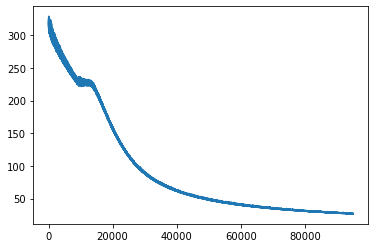

In [27]:
#amounts = np.random.rand(1,20) * 10
amounts = np.zeros((1,20))
#amounts[0,0] = 14
learning_rate = 1
#starting_learning_rate = .01
learning_rate_decay = 0#0.0000000001
errors = []

dinputs_momentums = np.zeros_like(amounts)
cache = np.zeros_like(amounts)
epsilon = 1e-7 

beta_1 = .99
beta_2 = .9

lambda_penalty = .05
penalty_cache = np.zeros_like(amounts)

for i in range(100000):

    outputs = np.dot(amounts, quality_rates)
    error = (outputs - target_values)**2
    error[0,0] = 0
    error[0,2:][outputs[0,2:] >= target_values[0,2:]] = 0.0
    errors.append(np.sum(error))

    penalty_deriv = np.zeros_like(amounts)
    penalty_deriv[amounts.copy() > food_limits.copy()] = 1
    penalty_deriv[amounts.copy() < food_req.copy()] = -1
    penalty_deriv = penalty_deriv * food_limits.copy()

    dloss = 2*(outputs - target_values)
    dmax = np.ones_like(outputs)

    #we are looking to stay calorie target, and minimize costs, so want to avoid those
    #but once all the other ones have hit their goals, set them to 0
    #dmax[0,1] = 0 if outputs[0,1] <= target_values[0,1] else dmax[0,1]
    #dmax[0,0] = 0
    dmax[0,2:][outputs[0,2:] >= target_values[0,2:]] = 0.0
    
    dfoods = dloss * dmax
    dinputs = np.dot(dfoods, quality_rates.T)

    #momentum
    dinputs_momentums = dinputs_momentums * beta_1 + dinputs.astype(float) * (1 - beta_1)
    correted_momentums = dinputs_momentums / (1 - beta_1 ** (i + 1))

    cache = cache + dinputs.astype(float) ** 2#* beta_2 + (1-beta_2) * dinputs.astype(float) ** 2
    corrected_cache = cache #/ (1 - beta_2 ** (i + 1))
    penalty_cache += penalty_deriv **2
    
    amounts += -learning_rate * (correted_momentums / (np.sqrt(corrected_cache) + epsilon)  + lambda_penalty * penalty_deriv * 1/np.sqrt(penalty_cache+epsilon))

    learning_rate = learning_rate * (1 / (1 + learning_rate_decay * i))

results = np.dot(amounts, quality_rates)
print(results)
print((results - target_values))
print("final error:", errors[-1])
plt.plot(errors[5000:])
plt.show()

In [20]:
penalty_deriv = np.zeros_like(amounts)
penalty_deriv[amounts.copy() > food_limits.copy()] = 1
penalty_deriv[amounts.copy() < food_req.copy()] = -1
penalty_deriv = penalty_deriv * food_limits.copy()
penalty_deriv

array([[0. , 0.3, 0. , 0. , 0. , 0. , 0.5, 1.5, 0. , 0. , 0. , 0. , 0. ,
        0.1, 0. , 0. , 2.1, 0. , 0. , 0. ]])

In [21]:
amounts

array([[2.94039465, 0.30011588, 0.15233841, 2.80127075, 1.49979092,
        0.99974944, 0.50003206, 1.50000348, 0.24948297, 0.49972262,
        0.49944849, 0.49985972, 0.49966698, 0.10000229, 0.60701259,
        0.99964463, 2.26052232, 0.0999446 , 2.29904132, 0.20999295]])

In [130]:
dmax

array([[1, 1, 0.0, 0.0, 1, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0]],
      dtype=object)